In [23]:
import torch
import seaborn as sns
import pandas as pd
import numpy as np
sns.set_theme()
root_path = '/Users/taylor/win/gitlab/thanayik/fsl-gca/'

[Text(0.5, 1.0, 'training and validation loss')]

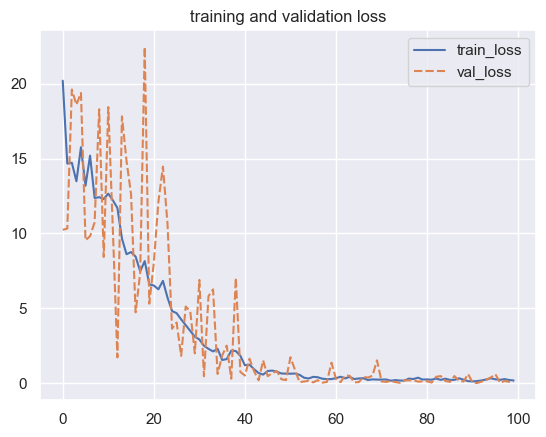

In [24]:
# create data frames from training loss and val loss

train_loss = pd.read_csv(root_path + 'loss_train.csv') 
train_loss = train_loss.rename(columns={"loss": "train_loss"})

val_loss = pd.read_csv(root_path + 'loss_val.csv') 
val_loss = val_loss.rename(columns={"loss": "val_loss"})

loss_df = pd.concat([train_loss, val_loss], axis=1)

ax = sns.lineplot(data=loss_df)
ax.set(title='training and validation loss')

[Text(0.5, 1.0, 'test scores')]

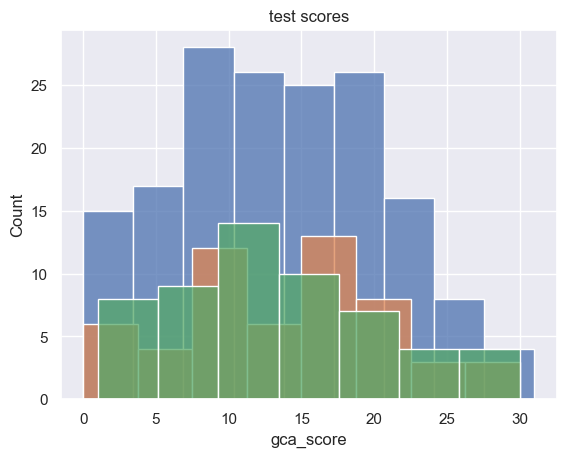

In [25]:
# plot histograms of train, test, val

train_scores = pd.read_csv(root_path + 'training_subject_files.csv') 
ax = sns.histplot(data=train_scores, x="gca_score")
ax.set(title='training scores')

val_scores = pd.read_csv(root_path + 'validation_subject_files.csv') 
ax = sns.histplot(data=val_scores, x="gca_score")
ax.set(title='validation scores')

test_scores = pd.read_csv(root_path + 'test_subject_files.csv') 
ax = sns.histplot(data=test_scores, x="gca_score")
ax.set(title='test scores')

In [26]:
# load a trained model
model_path = '/Users/taylor/win/gitlab/thanayik/fsl-gca/models/'
model_name = 'gca_model_27-10-2022-MSE_and_choroid.pt'
model_data = torch.load(
    model_path + model_name, 
    map_location=torch.device('cpu')
)

scores  predictions
scores       1.000000     0.990533
predictions  0.990533     1.000000

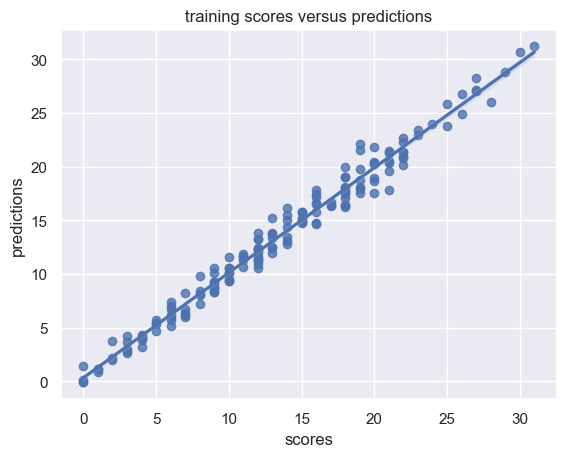

In [27]:
# plot training GCA scores versus predictions
train_scores = model_data['train_scores']
train_predictions = model_data['train_predictions']
training_df = pd.DataFrame(list(zip(train_scores, train_predictions)), columns =['scores', 'predictions'])
ax = sns.regplot(data=training_df, x='scores', y='predictions')
ax.set(title='training scores versus predictions')
training_df.corr()

0.949470872593082
18.627798339595095


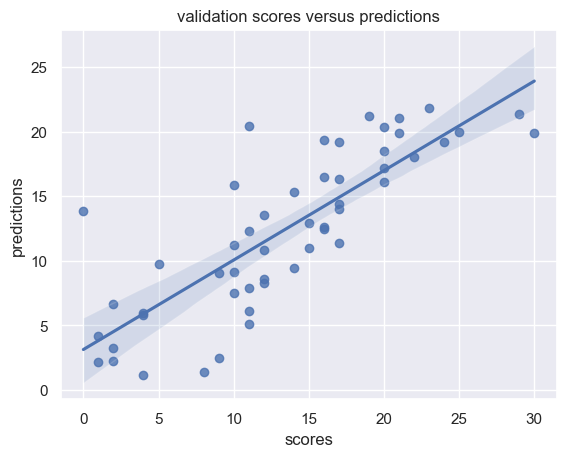

In [30]:
# plot validation GCA scores versus predictions
val_scores = model_data['val_scores']
val_predictions = model_data['val_predictions']
val_df = pd.DataFrame(list(zip(val_scores, val_predictions)), columns =['scores', 'predictions'])
ax = sns.regplot(data=val_df, x='scores', y='predictions')
ax.set(title='validation scores versus predictions')
val_df.corr()

diffs = np.array(train_scores) - np.array(train_predictions)
sq = np.square(diffs)
mse = np.mean(sq)
print(mse)

diffs = np.array(val_scores) - np.array(val_predictions)
sq = np.square(diffs)
mse = np.mean(sq)
print(mse)
